In [5]:
!pip install pdfplumber tiktoken chromaDB sentence-transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 74.7 MB/s eta 0:00:00
 

In [6]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib import table
import os
import matplotlib.image as mpimg

In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [8]:
file_path = '/content/drive/MyDrive/upgrad/Fashion Search AI dataset/Fashion Dataset v2.csv'

# Read the Fashion Dataset CSV file
fashion_data = pd.read_csv(file_path)
fashion_data.head()


,p_id,name,products,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
0,17048614,Khushal K Women Black Ethnic Motifs Printed Ku...,"Kurta, Palazzos, Dupatta",5099.0,Black,Khushal K,http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,Black printed Kurta with Palazzos with dupatta...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
1,16524740,InWeave Women Orange Solid Kurta with Palazzos...,"Kurta, Palazzos, Floral Print Dupatta",5899.0,Orange,InWeave,http://assets.myntassets.com/assets/images/165...,1081.0,4.119334,Orange solid Kurta with Palazzos with dupatta<...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
2,16331376,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,"Kurta, Trousers, Dupatta",4899.0,Navy Blue,Anubhutee,http://assets.myntassets.com/assets/images/163...,1752.0,4.161530,Navy blue embroidered Kurta with Trousers with...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
3,14709966,Nayo Women Red Floral Printed Kurta With Trous...,"Kurta, Trouser, Dupatta",3699.0,Red,Nayo,http://assets.myntassets.com/assets/images/147...,4113.0,4.088986,Red printed kurta with trouser and dupatta<br>...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
4,11056154,AHIKA Women Black & Green Printed Straight Kurta,Kurta,1350.0,Black,AHIKA,http://assets.myntassets.com/assets/images/110...,21274.0,3.978377,"Black and green printed straight kurta, has a ...","{'Body Shape ID': '424', 'Body or Garment Size..."


In [9]:
fashion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14214 entries, 0 to 14213
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   p_id          14214 non-null  int64  
 1   name          14214 non-null  object 
 2   products      14214 non-null  object 
 3   price         14214 non-null  float64
 4   colour        14214 non-null  object 
 5   brand         14214 non-null  object 
 6   img           14214 non-null  object 
 7   ratingCount   6530 non-null   float64
 8   avg_rating    6530 non-null   float64
 9   description   14214 non-null  object 
 10  p_attributes  14214 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 1.2+ MB


#### Embedding Layer

In [10]:
from sentence_transformers import SentenceTransformer
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction
import chromadb

In [ ]:
# Hugging Face setup
hf_api_key_path = "/content/drive/MyDrive/upgrad/huggingface_API_Key.txt"
with open(hf_api_key_path, "r") as f:
    hf_token = f.read().strip()

# Set token for authentication (required for private models or rate-limited use)
os.environ["HUGGINGFACEHUB_API_TOKEN"] = hf_token

# Define the Hugging Face model to use
hf_model_name = "sentence-transformers/all-MiniLM-L6-v2"

# Define the embedding function
embedding_function = SentenceTransformerEmbeddingFunction(
    model_name=hf_model_name,
    device='cpu'
)

# Initialize ChromaDB client and collection
chroma_data_path = '/content/drive/MyDrive/upgrad/Fashion Search AI dataset/ChromaDB'
client = chromadb.PersistentClient(path=chroma_data_path)
fashion_collection = client.get_or_create_collection(name='Fashion_Products', embedding_function=embedding_function)

# Load and process fashion data
file_path = '/content/drive/MyDrive/upgrad/Fashion Search AI dataset/Fashion Dataset v2.csv'
fashion_data = pd.read_csv(file_path)

# Add metadata
fashion_data['metadata'] = fashion_data.apply(
    lambda x: {
        'Product_id': x['p_id'],
        'Name': x['name'],
        'Product_type': x['products'],
        'Price_INR': x['price'],
        'Colour': x['colour'],
        'Brand': x['brand'],
        'RatingCount': x['ratingCount'],
        'Rating': x['avg_rating'],
        'Description': x['description'],
        'Product_attributes': x['p_attributes']
    }, axis=1
)

# Extract text for embedding
def extract_text(metadata):
    text_content = ""
    if "Description" in metadata and metadata["Description"]:
        text_content += metadata["Description"]
    if "Name" in metadata:
        text_content += " " + metadata["Name"]
    return text_content.strip() or "No description available."

documents = [extract_text(row['metadata']) for _, row in fashion_data.iterrows()]

# Add data to ChromaDB
for idx, (p_id, metadata) in enumerate(zip(fashion_data['p_id'], fashion_data['metadata'])):
    print(f"Processing document with p_id={p_id}")
    print(f"Document text: {documents[idx]}")
    fashion_collection.add(
        documents=[documents[idx]],
        ids=[str(p_id)],
        metadatas=[metadata]
    )

print("Data added to ChromaDB collection using Hugging Face embeddings!")


Streaming output truncated to the last 5000 lines.
Processing document with p_id=18351146
Document text: Blue and green leheriya printed dupatta has leheriya technique,,  embellished borderLength: 89 inch, Width: 40 inchCotton Blend<br>Hand Wash Apratim Blue & Green Printed Leheriya Dupatta
Processing document with p_id=6975601
Document text: Navy blue self-checked dupatta, has a fringed borderLength: 2.13 metre<br>Width: 0.74 metrePure Cotton<br> Hand-wash AURELIA Navy Blue Self-Checked Pure Cotton Dupatta
Processing document with p_id=15241584
Document text: Magenta and gold-toned geometric woven design dupatta, woven design borderPure cotton <br> Hand washThe model (height 5'7", chest 34" and waist 28") is wearing onesize Clora Creation Magenta & Gold-Toned Woven Design Pure Cotton Dupatta
Processing document with p_id=18474216
Document text: <p>Set Content: 1 Dupatta; Color: Pink; Pattern: Printed; Material: Nylon</p>/<p>Material: 100% Nylon; Machine Wash</p> Melange by Lifestyle W

In [53]:
cache_collection_name = 'Fashion_Cache'
# Create or retrieve the cache collection for fashion search using the PersistentClient
cache_collection = client.get_or_create_collection(name=cache_collection_name, embedding_function=embedding_function)


#### Search Layer

In [15]:
from PIL import Image
import requests
from io import BytesIO

In [54]:
query = input("Write a query: ")

Write a query: yellow tops for women


In [55]:
# Searching the Cache collection
cache_results = cache_collection.query(
    query_texts=query,
    n_results=3  # Number of results to retrieve
)
cache_results



{'ids': [['green tops for women', 'blue formal tops']],
 'embeddings': None,
 'documents': [['green tops for women', 'blue formal tops']],
 'uris': None,
 'included': ['metadatas', 'documents', 'distances'],
 'data': None,
 'metadatas': [[{'included0': 'm',
    'included2': 't',
    'metadatas3': '{\'Brand\': \'Tokyo Talkies\', \'Product_id\': 9920745, \'Colour\': \'Green\', \'Rating\': 4.161467889908256, \'Description\': \'Green solid regular top, has a tie-up neck, long bell sleevesPolyester<br>Machine-washThe model (height 5\\\'8") is wearing a size S\', \'Price_INR\': 949.0, \'Name\': \'Tokyo Talkies Women Green Solid Top\', \'RatingCount\': 545.0, \'Product_attributes\': "{\'Body Shape ID\': \'324,424\', \'Body or Garment Size\': \'To-Fit Denotes Body Measurements in\', \'Closure\': \'NA\', \'Fabric\': \'Polyester\', \'Fabric Type\': \'NA\', \'Length\': \'Regular\', \'Lining\': \'NA\', \'Main Trend\': \'New Basics\', \'Neck\': \'Tie-Up Neck\', \'Occasion\': \'Casual\', \'Pattern\'

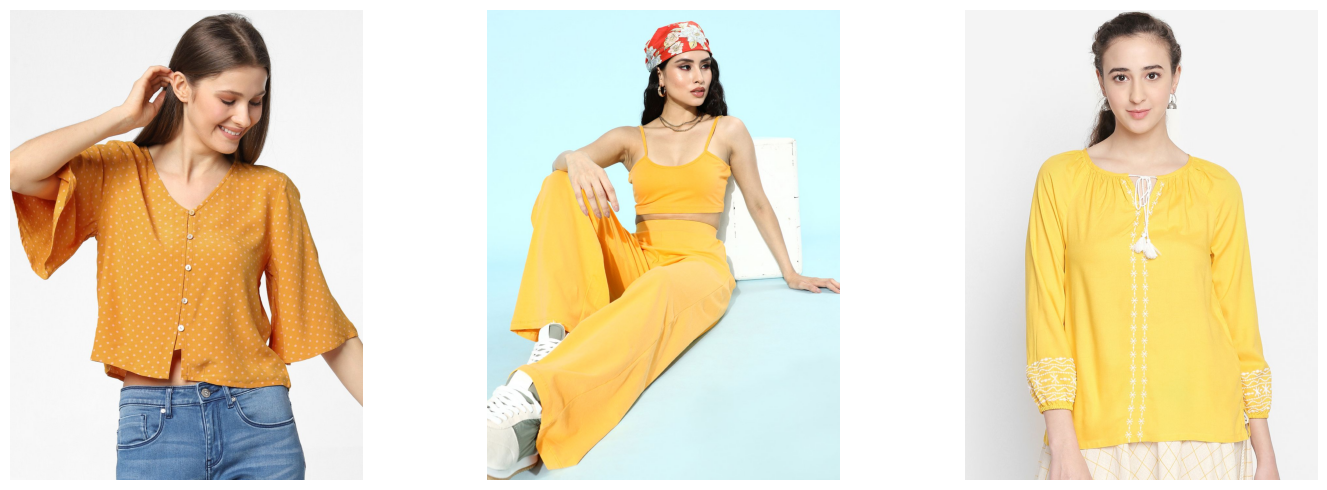

-------------------------------------------------------



dict_items([('ids', [['11702546', '15834478', '9802407']]), ('embeddings', None), ('documents', [['Yellow and pink polka dots printed woven regular top, has a V-neck, three-quarter flared sleeves, and button closureMaterial: Viscose Rayon<br>  Machine WashThe model (height 5\'8") is wearing a size S ONLY Women Yellow & Pink Polka Dots Printed Top With Flared Sleeves', "Yellow Top And Pant Set<br>  Alluring and fashionable, this set is a must-have in your collection. It comes with gorgeous shoulder straps and a sleeveless design to add beauty to your look.&nbsp;<ul><li>Yellow colour</li><li>Classic solid pattern</li><li>Shoulder straps</li><li>Sleeveless</li><li>Cotton blend, machine wash</li></ul><b>Trend Alert</b><br>Co-ord sets are two-piece outfits that are made by matching both the pieces in the same fabric, colour, or pattern. They are not only trendy but also highly versatile.<br>The model (height 5'8) is wearing a size SCotton Blend<br>Machine Wash SCORPIUS Women Yellow Solid Co

In [56]:
results = fashion_collection.query(
    query_texts=query,
    n_results=3  # Number of results to retrieve
)

item_ids = results['ids'][0]

num_images = len(item_ids)  # number of images

num_cols = 3  # number of columns for the grid layout
num_rows = (num_images + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))
axes = axes.flatten()

# Display the images along with metadata
for i, item_id in enumerate(item_ids):
    item_row = fashion_data[fashion_data['p_id'] == int(item_id)]

    # Check if the image file exists
    if not item_row.empty:
        image_url = item_row['img'].values[0]
        try:
            response = requests.get(image_url)
            img = Image.open(BytesIO(response.content))
            axes[i].imshow(img)
            axes[i].axis('off')
        except Exception as e:
            axes[i].axis('off')
            axes[i].text(0.5, 0.5, f"Failed to load image for item ID: {item_id}",
                         fontsize=12, ha='center', va='center')
    else:
        axes[i].axis('off')
        axes[i].text(0.5, 0.5, f"No data found for item ID: {item_id}",
                     fontsize=12, ha='center', va='center')


# Hide any remaining empty subplots
for j in range(num_images, num_rows * num_cols):
    axes[j].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


print("-------------------------------------------------------\n")
# Extract and display the items retrieved from the search operation
results.items()




In [57]:
# Cache in Semantic Search

threshold = 0.2

ids = []
documents = []
distances = []
metadatas = []
results_df = pd.DataFrame()

# Check if the distance is greater than the threshold, if so, return results from the main collection
if cache_results['distances'][0] == [] or cache_results['distances'][0][0] > threshold:
    # Query the collection against the user query and return the results
    results = fashion_collection.query(
        query_texts=query,
        n_results=3
    )

    # Store the query in cache_collection as a document with respect to ChromaDB for future reference
    # Store retrieved text, ids, distances, and metadatas in cache_collection as metadatas, so they can be fetched easily if a query indeed matches to a query in cache
    Keys = []
    Values = []

    for key, val in results.items():
        if val is None:
            continue
        for i in range(len(val[0])):  # Iterate over the actual length of val
            Keys.append(str(key) + str(i))
            if len(val[0]) > i:  # Check if the current index exists in val
                Values.append(str(val[0][i]))

    cache_collection.add(
        documents=[query],
        ids=[query],
        metadatas=dict(zip(Keys, Values))
    )

    # Print message indicating the results are found in the main collection
    print("Not found in cache. Found in the main collection.")

    # Construct a DataFrame from the query results
    result_dict = {'Metadatas': results['metadatas'][0], 'Documents': results['documents'][0], 'Distances': results['distances'][0], "IDs": results["ids"][0]}
    results_df = pd.DataFrame.from_dict(result_dict)


# If the distance is less than the threshold, return results from the cache
elif cache_results['distances'][0][0] <= threshold and cache_results['ids']:
    cache_result_dict = cache_results['metadatas'][0][0]

    # Loop through each inner list and then through the dictionary
    for key, value in cache_result_dict.items():
        if 'ids' in key:
            ids.append(value)
        elif 'documents' in key:
            documents.append(value)
        elif 'distances' in key:
            distances.append(value)
        elif 'metadatas' in key:
            metadatas.append(value)

    # Print message indicating the results are found in the cache
    print("Found in cache!")

    # Create a DataFrame from the cached results
    results_df = pd.DataFrame({
        'IDs': ids,
        'Documents': documents,
        'Distances': distances,
        'Metadatas': metadatas
    })
else:
    # Print message indicating no valid results found in cache
    print("No valid results found in cache!")



Not found in cache. Found in the main collection.


In [58]:
results_df.head()

,Metadatas,Documents,Distances,IDs
0,{'Description': 'Yellow and pink polka dots pr...,Yellow and pink polka dots printed woven regul...,0.711044,11702546
1,"{'Product_type': 'Co-Ord Set', 'Description': ...",Yellow Top And Pant Set<br> Alluring and fash...,0.715564,15834478
2,"{'Product_id': 9802407, 'Description': 'Yellow...","Yellow embroidered woven regular top, has a ti...",0.730466,9802407


#### Ranking with Cross Encoder

In [18]:
from sentence_transformers import CrossEncoder, util


In [19]:
cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

In [59]:
cross_inputs = [[query, response] for response in results_df['Documents']]  # Create input pairs for the cross encoder, consisting of each query paired with each response
cross_rerank_scores = cross_encoder.predict(cross_inputs) # Generate cross-encoder scores for the input pairs
cross_rerank_scores


array([5.5061975, 5.3012514, 6.2818813], dtype=float32)

In [60]:
results_df['Reranked_scores'] = cross_rerank_scores
results_df


,Metadatas,Documents,Distances,IDs,Reranked_scores
0,{'Description': 'Yellow and pink polka dots pr...,Yellow and pink polka dots printed woven regul...,0.711044,11702546,5.506197
1,"{'Product_type': 'Co-Ord Set', 'Description': ...",Yellow Top And Pant Set<br> Alluring and fash...,0.715564,15834478,5.301251
2,"{'Product_id': 9802407, 'Description': 'Yellow...","Yellow embroidered woven regular top, has a ti...",0.730466,9802407,6.281881


In [61]:
# Return the top 3 results from semantic search based on the Distance
top_3_semantic = results_df.sort_values(by='Distances', ascending=False)[:3]
top_3_semantic

,Metadatas,Documents,Distances,IDs,Reranked_scores
2,"{'Product_id': 9802407, 'Description': 'Yellow...","Yellow embroidered woven regular top, has a ti...",0.730466,9802407,6.281881
1,"{'Product_type': 'Co-Ord Set', 'Description': ...",Yellow Top And Pant Set<br> Alluring and fash...,0.715564,15834478,5.301251
0,{'Description': 'Yellow and pink polka dots pr...,Yellow and pink polka dots printed woven regul...,0.711044,11702546,5.506197


In [63]:
# Return the top 3 results by reranking
top_3_rerank = results_df.sort_values(by='Reranked_scores', ascending=False)
top_3_rerank

,Metadatas,Documents,Distances,IDs,Reranked_scores
2,"{'Product_id': 9802407, 'Description': 'Yellow...","Yellow embroidered woven regular top, has a ti...",0.730466,9802407,6.281881
0,{'Description': 'Yellow and pink polka dots pr...,Yellow and pink polka dots printed woven regul...,0.711044,11702546,5.506197
1,"{'Product_type': 'Co-Ord Set', 'Description': ...",Yellow Top And Pant Set<br> Alluring and fash...,0.715564,15834478,5.301251


In [64]:
top_3_RAG = top_3_rerank[["Documents", "Metadatas","IDs"]]
top_3_RAG

,Documents,Metadatas,IDs
2,"Yellow embroidered woven regular top, has a ti...","{'Product_id': 9802407, 'Description': 'Yellow...",9802407
0,Yellow and pink polka dots printed woven regul...,{'Description': 'Yellow and pink polka dots pr...,11702546
1,Yellow Top And Pant Set<br> Alluring and fash...,"{'Product_type': 'Co-Ord Set', 'Description': ...",15834478
